# Multi-class Classification Model
* More than 3 classes

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import itertools
from sklearn.datasets import *
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
print(tf.config.list_physical_devices('GPU'))
import random


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [52]:
(train_data, train_labels),(test_data, test_lables) = fashion_mnist.load_data()

In [53]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

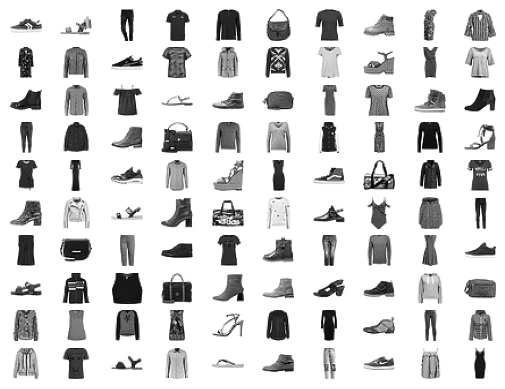

In [54]:
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    index = random.choice(range(len(train_data)))
    plt.imshow(train_data[index],cmap=plt.cm.binary)
    # plt.title(classes[train_labels[index]])
    plt.axis(False)

* Input shape = 28 x 28
* Output shape = 10
* Loss function = Categorical Cross Entropy
* Activation = Softmax

In [55]:
tf.random.set_seed(42)

In [56]:
def plot(model, X: np.ndarray, y: np.ndarray):
    x_max, x_min = X[:, 0].max() + 0.1, X[:, 0].min() - 0.1
    y_max, y_min = X[:, 1].max() + 0.1, X[:, 1].min() - 0.1
    print("X max and min: ", x_max, x_min)
    print("Y max and min: ", y_max, y_min)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    print("Dimension meshgrid: ", xx.shape, yy.shape)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    print("Dimension ravel: ", x_in.shape)
    pred = model.predict(x_in)
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Loss: {loss}\nAccuracy: {accuracy*100:2f}")

    if len(pred[0]) > 1:
        print("Multiclass")
        pred = np.argmax(pred, axis=1).reshape(xx.shape)
    else:
        print("Binary")
        pred = np.round(pred).reshape(xx.shape)

    plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [57]:
test_lables.shape,test_data.shape

((10000,), (10000, 28, 28))

In [58]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#CategoricalCrossentropy() for one-hot labels only
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


history = model.fit(
    train_data,
    train_labels,
    epochs=100,
    verbose=0,
    validation_data=(test_data, test_lables)
)

In [59]:
train_data.min(), train_data.max()

(0, 255)

# Neural networks tend to perform better when data is normalized or scaled between 0 and 1

In [60]:
# Normalizing the data
train_data_n = train_data/255.0
test_data_n = test_data/255.0

In [61]:
# Normalized dataset
norm_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#CategoricalCrossentropy() for one-hot labels only
norm_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


norm_history = norm_model.fit(
    train_data_n,
    train_labels,
    epochs=100,
    validation_data=(test_data_n, test_lables)
)

Epoch 1/100
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6216 - accuracy: 0.7733 - val_loss: 0.5677 - val_accuracy: 0.8032
Epoch 2/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4806 - accuracy: 0.8285 - val_loss: 0.5204 - val_accuracy: 0.8232
Epoch 3/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4532 - accuracy: 0.8400 - val_loss: 0.4973 - val_accuracy: 0.8086
Epoch 4/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4319 - accuracy: 0.8492 - val_loss: 0.4787 - val_accuracy: 0.8263
Epoch 5/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4188 - accuracy: 0.8529 - val_loss: 0.4767 - val_accuracy: 0.8338
Epoch 6/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4141 - accuracy: 0.8558 - val_loss: 0.4612 - val_accuracy: 0.8489
Epoch 7/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3931 - accuracy: 0.8619 - val_loss: 0.455

# Notes to self: Normalized data takes longer to train (100% increase in duration)

313/313 [==============================] - 2s 7ms/step - loss: 2.3031 - accuracy: 0.1000


([0.5412316918373108, 0.8567000031471252],
 [2.303095579147339, 0.10000000149011612])

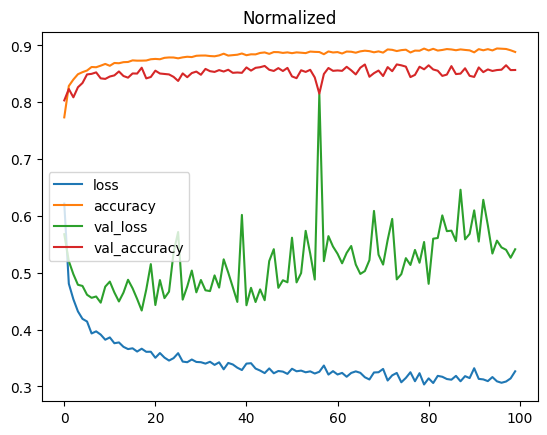

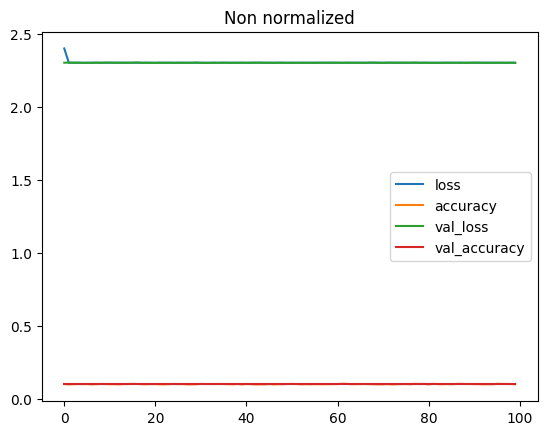

In [64]:
pd.DataFrame(norm_history.history).plot(title="Normalized")
pd.DataFrame(history.history).plot(title="Non normalized")
norm_model.evaluate(test_data_n,test_lables), model.evaluate(test_data,test_lables)
